# **Q 2.1**

**Importing important libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the week2.csv file into a Dataframe**

In [0]:
df = pd.read_csv("/content/drive/My Drive/internship/week2.csv")

**Datatype of date column**

In [3]:
print(df['Date'].dtype)

object


In [4]:
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


**Converting the Date column to the index of the dataframe**

In [0]:
df.set_index('Date', inplace = True)

In [6]:
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight Positive
2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,2019,5,904.435998,0.008561,Slight Positive
2019-05-08,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,2019,5,904.046560,-0.007177,Slight Negative
2019-05-09,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,2019,5,903.591847,0.002363,Slight or No change


**Plotting the closing price of each of the days for the entire time frame**

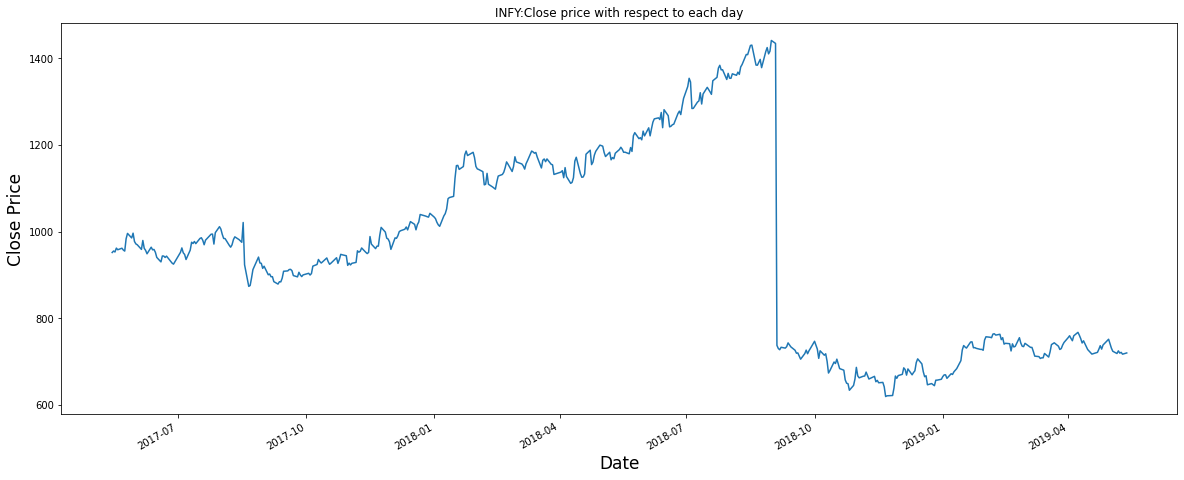

In [7]:
df['Close Price'].plot(figsize=(20,8))
plt.xlabel('Date', size = 17)
plt.ylabel('Close Price', size = 17)
plt.title('INFY:Close price with respect to each day')
plt.show()

*It is fairly observable from the graph that a fall in 'Price' is observed between 2018-07 and 2018-10.*



In [8]:
print('max change : ',df['Day_Perc_Change'].max())
print('min change : ',df['Day_Perc_Change'].min())

max change :  0.046810910582444576
min change :  -0.4860379989541572


*A negative number shows that the price dropped from the previous day.
A positive number shows that the price rised from the previous day.*


In [9]:
print(df['Day_Perc_Change'].idxmin())

2018-09-04 00:00:00


*Using idxmin() we found that on September 4, 2018 (the 2nd trading day of the month) the price has been dropeed.*

*we can see that this above result is obtained from the 'Day_Perc-Change' column because the value of this column is calculated from 'Close-Price' column*



**Showing the dropped price in dataframe:**


In [10]:
df.loc['2018-09-01':'2018-09-06']

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-09-03,INFY,EQ,1441.10,1449.00,1467.90,1430.0,1436.2,1434.25,1451.30,5488164,7.964966e+09,134643,3571594,65.08,2018,9,1069.856520,-0.004753,Slight or No change
2018-09-04,INFY,EQ,1434.25,722.00,748.50,716.0,733.0,737.15,739.04,15370124,1.135916e+10,258728,6954062,45.24,2018,9,1066.727046,-0.486038,Bear drop
2018-09-05,INFY,EQ,737.15,741.95,744.05,725.4,729.0,729.90,734.79,8658978,6.362540e+09,202826,3839883,44.35,2018,9,1064.951585,-0.009835,Slight Negative
2018-09-06,INFY,EQ,729.90,732.55,735.50,724.1,726.0,727.15,730.17,5598659,4.087989e+09,134849,3493840,62.40,2018,9,1063.804209,-0.003768,Slight or No change


On September 4 2018,why did the stock price reach down from 1434.25 to 737.15?

This is a drastic change. The possible reason behind this could be: Infosys board approved the issue of bonus shares to celebrate the 25th year of company's public listing in India. It had announced a 1:1 bonus for its shareholders in July that year.so September 4, 2018 has been fixed as the record date for the purpose of allotment of bonus shares so the price has become half and all the share holder got one extra shares for each shares they held in their Demat account. 
(Source:Quora)

# **Q 2.2**

**Displaying stem plot of the daily change in stock price in percentage**

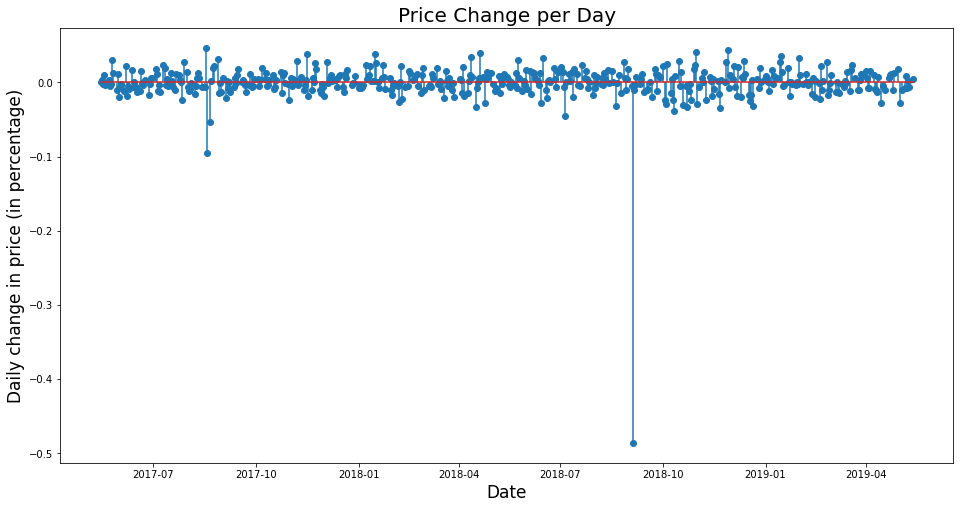

In [11]:
plt.figure(figsize=(16,8))
plt.stem(df.index.values,df['Day_Perc_Change'],use_line_collection=True)
plt.xlabel('Date',size=17)
plt.ylabel('Daily change in price (in percentage)',size=17)
plt.title('Price Change per Day', size = 20)
plt.show()

Here from the stem plot we can see that  there is a large change in daily price is observed between 2018-07 and 2018-10

# **Q 2.3**

**Plotting the daily volume and comparing the percentage stem plot to it**

<StemContainer object of 3 artists>

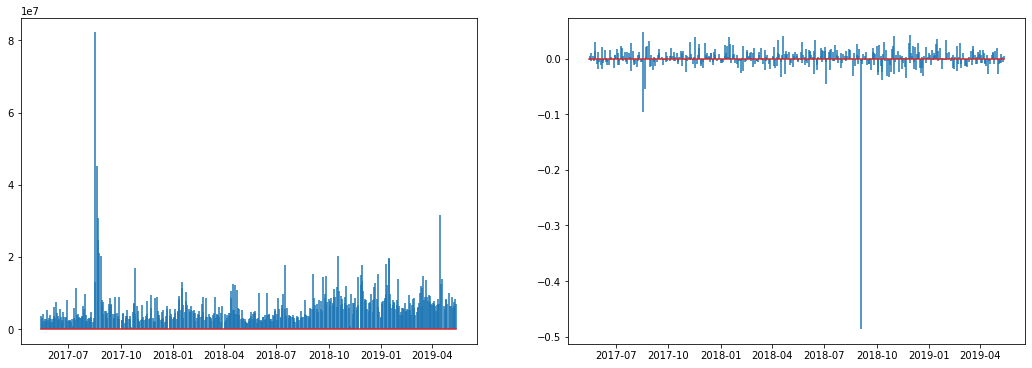

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.stem(df.index.values,df['Total Traded Quantity'],use_line_collection=True, markerfmt = ' ')
ax2.stem(df.index.values,df['Day_Perc_Change'],use_line_collection=True, markerfmt = ' ')

In [0]:
max_old = df['Total Traded Quantity'].max()
min_old = df['Total Traded Quantity'].min()
#To  make both data to be in the range of 0-100
tota_traded_quantity_normalized = ((df['Total Traded Quantity'] - min_old)/(max_old - min_old)) * (1 - 0) + 0

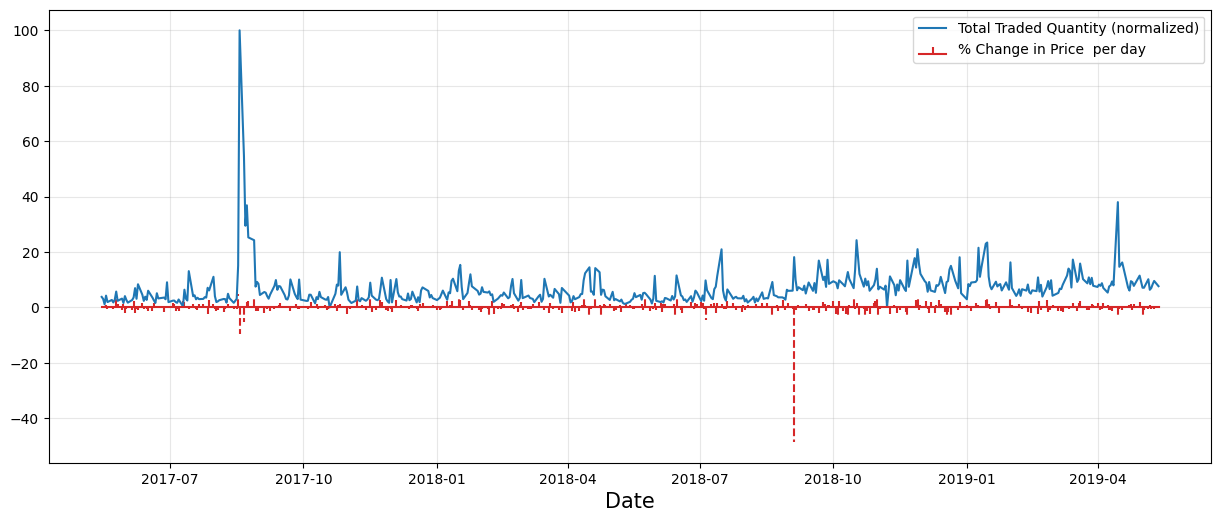

In [14]:
plt.figure(figsize = (15,6), dpi = 100)
plt.plot(tota_traded_quantity_normalized*100)
plt.grid(alpha=0.3)
plt.stem( df.index.values ,df['Day_Perc_Change']*100,use_line_collection=True,linefmt = 'C3--', markerfmt = ' ')
plt.legend(['Total Traded Quantity (normalized)', '% Change in Price  per day'])
plt.xlabel('Date', size = 15)
plt.show()

whenever the  daily percentages increases the total traded quantity also increases by somewhat the same amount.
And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major role in the increase of the total traded quantity

# **Q 2.4**

**Checking how often each trend type occurs**

In [15]:
df['Trend'].value_counts()

Slight or No change    156
Positive               106
Negative                87
Slight Positive         64
Slight Negative         58
Among top gainers       12
Among top losers         9
Bear drop                2
Name: Trend, dtype: int64

**Using
 the groupby function with the trend column to group all days with the same trend into a single group**

In [16]:
group = df.groupby(['Trend'])['Total Traded Quantity']
group.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Among top gainers,12.0,1.259063e+07,4.729956e+06,4870285.0,9614705.75,12042170.5,14798897.25,20356054.0
Among top losers,9.0,1.463854e+07,1.165235e+07,8050938.0,9041701.00,10985897.0,12802132.00,45203588.0
Bear drop,2.0,4.878630e+07,4.725761e+07,15370124.0,32078213.00,48786302.0,65494391.00,82202480.0
Negative,87.0,5.634151e+06,3.669806e+06,2042500.0,3347398.00,5088554.0,7261985.00,31574803.0
Positive,106.0,6.655530e+06,4.718451e+06,758956.0,3522758.75,5523811.5,8504617.25,30642095.0
Slight Negative,58.0,5.454672e+06,3.031108e+06,1908235.0,2995621.50,4616803.0,7126371.25,13801105.0
Slight Positive,64.0,5.848807e+06,3.149469e+06,1961205.0,3582044.00,5301784.0,7118793.25,18130292.0
Slight or No change,156.0,4.647983e+06,2.813924e+06,545717.0,2939307.75,4043539.5,5613226.25,24621299.0


In [17]:
total= dict(df.groupby('Trend')['Total Traded Quantity'].sum())
keys=total.keys()
print(keys)
print(total.values())

dict_keys(['Among top gainers', 'Among top losers', 'Bear drop', 'Negative', 'Positive', 'Slight Negative', 'Slight Positive', 'Slight or No change'])
dict_values([151087534, 131746836, 97572604, 490171179, 705486215, 316370979, 374323658, 725085416])


**Plotting a pie chart for all the 'Trend' to know about relative frequency of each trend.**

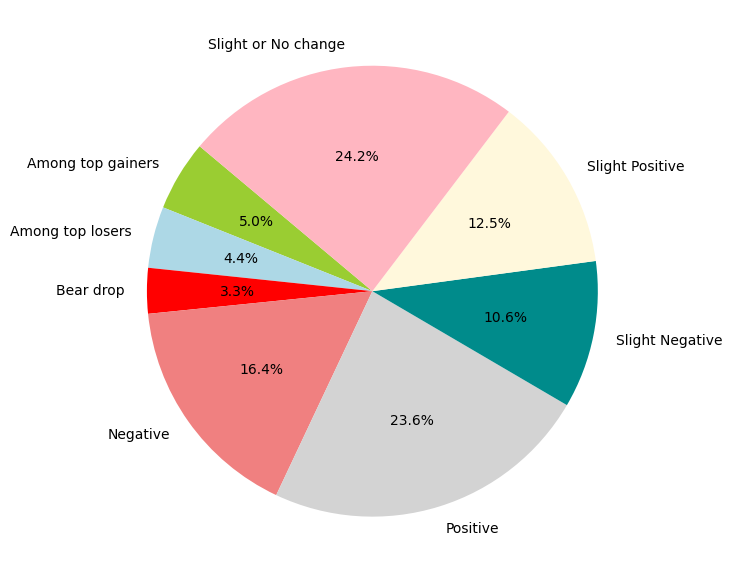

In [18]:
plt.figure(figsize = (16,8), dpi = 100)

grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.0)

plt.subplot(grid[0:, 0])
plt.subplot(1,2,1)
colors = ['yellowgreen', 'lightblue', 'red', 'lightcoral', 'lightgrey', 'darkcyan', 'cornsilk','lightpink']
pie_plot = plt.pie(total.values(), labels = total.keys(),autopct = '%1.1f%%', startangle=140, colors = colors)

**From the grouped data, creating a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.**

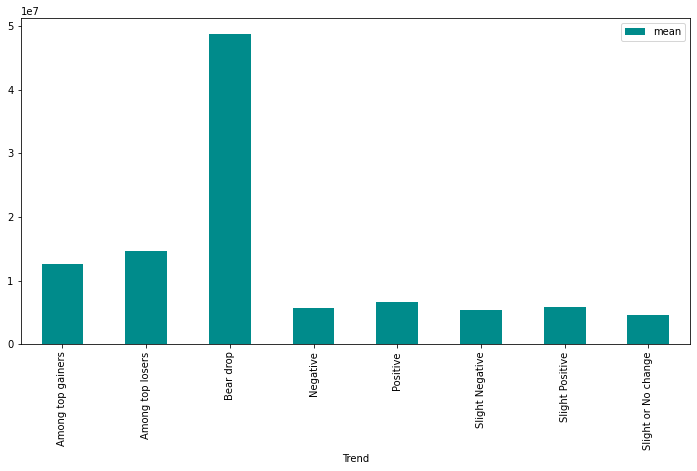

In [19]:
group.mean().plot.bar(figsize=(12,6),color='darkcyan')
plt.legend(['mean'])
plt.show()

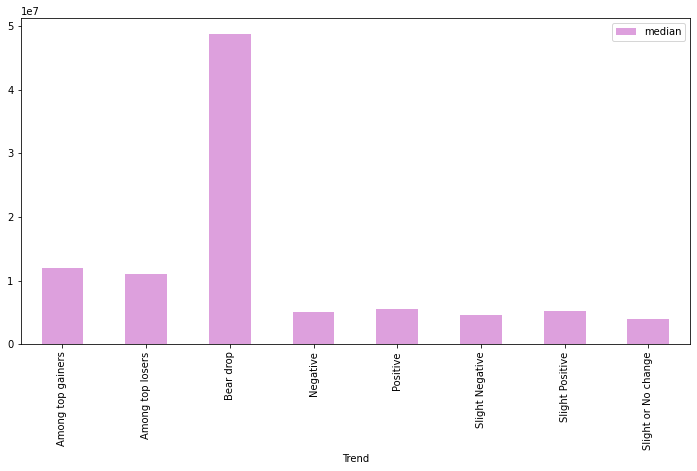

In [20]:
group.median().plot.bar(figsize=(12,6),color='plum')
plt.legend(['median'])
plt.show()

# **Q 2.5**

**Plotting the daily return (percentage) distribution as histogram**

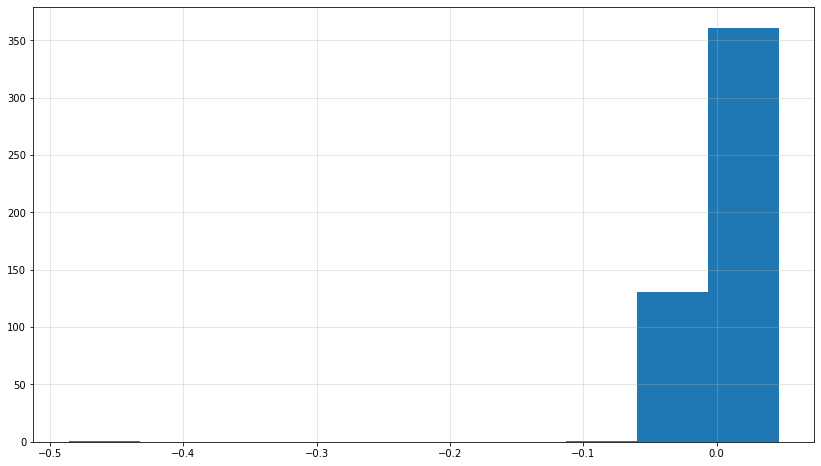

In [21]:
plt.figure(figsize=(14,8))
plt.hist(df['Day_Perc_Change'])
plt.grid(alpha=0.4)
plt.show()

# **Q 2.6**

**Loading 5 stocks into 5 dataframe**

In [0]:
BajajElec = pd.read_csv('/content/drive/My Drive/internship/BAJAJELEC.csv')
LuxInd = pd.read_csv('/content/drive/My Drive/internship/LUXIND.csv')
Raymond = pd.read_csv('/content/drive/My Drive/internship/RAYMOND.csv')
ITDC = pd.read_csv('/content/drive/My Drive/internship/ITDC.csv')
JetAirways = pd.read_csv('/content/drive/My Drive/internship/JETAIRWAYS.csv')

**We need to retain the only rows for which ‘Series’ column has value 'EQ'**

In [23]:
print(BajajElec['Series'].value_counts())
print(LuxInd['Series'].value_counts())
print(Raymond['Series'].value_counts())
print(ITDC['Series'].value_counts())
print(JetAirways['Series'].value_counts())

EQ    494
Name: Series, dtype: int64
EQ    494
Name: Series, dtype: int64
EQ    494
Name: Series, dtype: int64
EQ    494
Name: Series, dtype: int64
EQ    494
Name: Series, dtype: int64


*All the 5 stocks have no rows for which 'Series' column's value is other than 'EQ'*

**Only keeping the 'Close price' column and making Date as the index of the Dataframe**

In [0]:
#Bajaj Electronis
BajajElec = BajajElec[BajajElec['Series'] == 'EQ'][['Close Price', 'Date']]
BajajElec.set_index('Date', drop = True, inplace = True)
#Lux India
LuxInd = LuxInd[LuxInd['Series'] == 'EQ'][['Close Price', 'Date']]
LuxInd.set_index('Date', drop = True, inplace = True)
#Raymond
Raymond  =Raymond [Raymond ['Series'] == 'EQ'][['Close Price', 'Date']]
Raymond .set_index('Date', drop = True, inplace = True)
#Reliance communication
ITDC= ITDC[ITDC['Series'] == 'EQ'][['Close Price', 'Date']]
ITDC.set_index('Date', drop = True, inplace = True)
#Jet Airways
JetAirways = JetAirways[JetAirways['Series'] == 'EQ'][['Close Price', 'Date']]
JetAirways.set_index('Date', drop = True, inplace = True)

In [25]:
print(BajajElec.head())
print(LuxInd.head())
print(Raymond.head())
print(ITDC.head())
print(JetAirways.head())


             Close Price
Date                    
15-May-2017       341.15
16-May-2017       347.00
17-May-2017       349.85
18-May-2017       334.10
19-May-2017       336.20
             Close Price
Date                    
15-May-2017       819.60
16-May-2017       817.50
17-May-2017       819.80
18-May-2017       820.05
19-May-2017       817.80
             Close Price
Date                    
15-May-2017       772.80
16-May-2017       785.00
17-May-2017       783.65
18-May-2017       746.95
19-May-2017       723.10
             Close Price
Date                    
15-May-2017       650.15
16-May-2017       636.70
17-May-2017       626.75
18-May-2017       604.65
19-May-2017       594.30
             Close Price
Date                    
15-May-2017       527.50
16-May-2017       534.15
17-May-2017       528.90
18-May-2017       522.70
19-May-2017       520.40


In [26]:
new_df = pd.DataFrame({'Bajaj':BajajElec['Close Price'],
                                    'Lux': LuxInd['Close Price'],
                                    'Raymond':Raymond['Close Price'],
                                    'ITDC': ITDC['Close Price'],
                                    'JetAirways': JetAirways['Close Price']})
new_df.dropna()

,Bajaj,Lux,Raymond,ITDC,JetAirways
Date,,,,,
15-May-2017,341.15,819.60,772.80,650.15,527.50
16-May-2017,347.00,817.50,785.00,636.70,534.15
17-May-2017,349.85,819.80,783.65,626.75,528.90
18-May-2017,334.10,820.05,746.95,604.65,522.70
19-May-2017,336.20,817.80,723.10,594.30,520.40
...,...,...,...,...,...
07-May-2019,557.75,1314.40,808.95,254.30,127.30
08-May-2019,534.45,1268.50,807.10,251.95,131.35
09-May-2019,531.85,1248.20,805.30,246.25,147.40


In [27]:
new_df.shape

(494, 5)

**Creating a new dataframe which is a percentage change of the values in the previous dataframe(new_df)**

In [28]:
pct_change_dataFrame = new_df.pct_change()
pct_change_dataFrame.dropna()

,Bajaj,Lux,Raymond,ITDC,JetAirways
Date,,,,,
16-May-2017,0.017148,-0.002562,0.015787,-0.020688,0.012607
17-May-2017,0.008213,0.002813,-0.001720,-0.015627,-0.009829
18-May-2017,-0.045019,0.000305,-0.046832,-0.035261,-0.011722
19-May-2017,0.006286,-0.002744,-0.031930,-0.017117,-0.004400
22-May-2017,-0.068263,-0.000917,-0.009888,-0.033064,-0.085992
...,...,...,...,...,...
07-May-2019,-0.000179,-0.014471,0.003598,-0.039471,-0.045727
08-May-2019,-0.041775,-0.034921,-0.002287,-0.009241,0.031815
09-May-2019,-0.004865,-0.016003,-0.002230,-0.022624,0.122193


**Using seaborn, analysing the correlation between the percentage changes in the five stocks.**

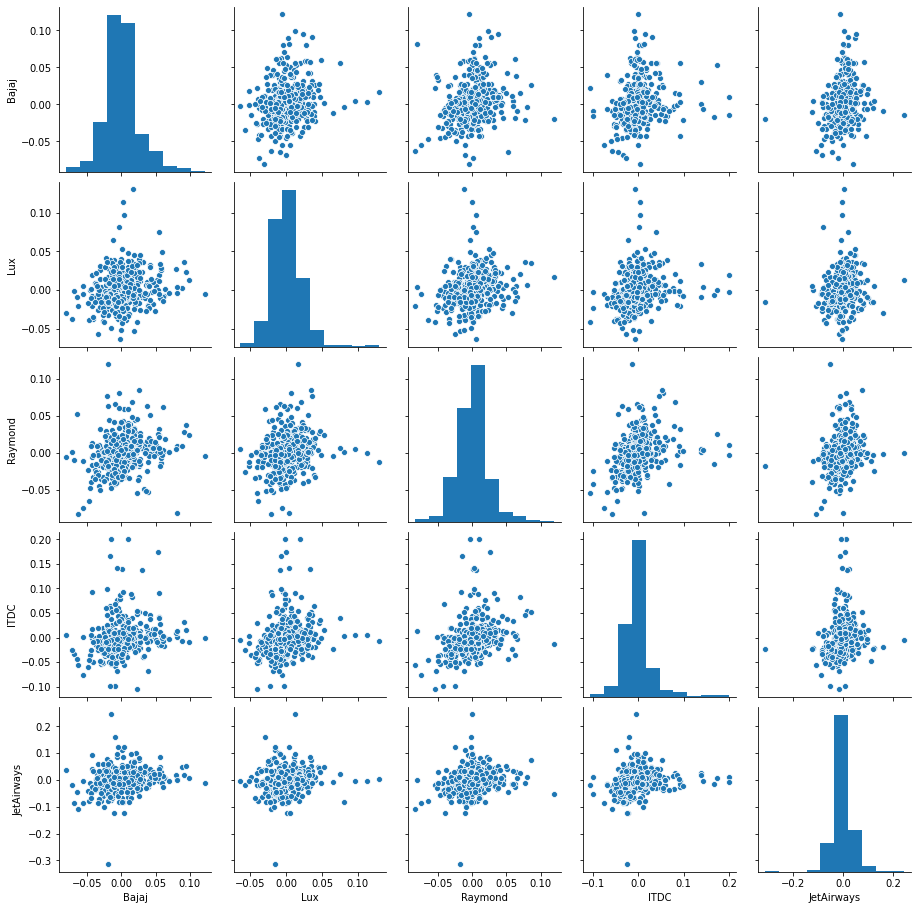

In [29]:
import seaborn as sns
sns.pairplot(pct_change_dataFrame)

# **Q 2.7**

**Calculating the 7 day rolling average of the percentage change of Bajaj stock price**

In [30]:
import matplotlib.pyplot as plt
rolling_avg_bajaj= pct_change_dataFrame['Bajaj'].rolling(7).mean()
rolling_avg_bajaj

Date
15-May-2017         NaN
16-May-2017         NaN
17-May-2017         NaN
18-May-2017         NaN
19-May-2017         NaN
                 ...   
07-May-2019   -0.001427
08-May-2019   -0.008777
09-May-2019   -0.009824
10-May-2019   -0.007781
13-May-2019   -0.006023
Name: Bajaj, Length: 494, dtype: float64

**computing the standard deviation (which is the square root of the variance) and plotting the values.**

In [31]:
std_deviation = rolling_avg_bajaj.std()
std_deviation

0.009378640608991372

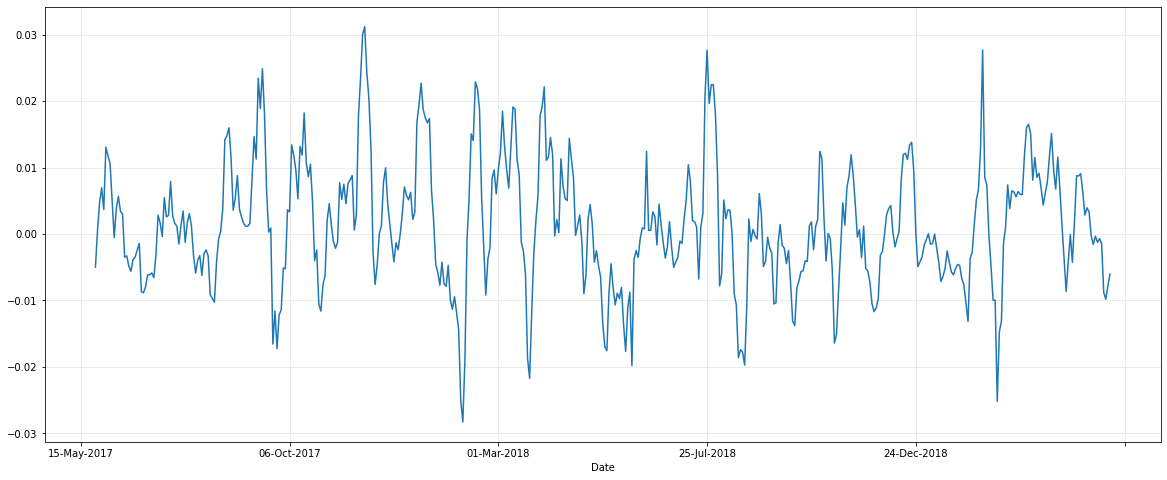

In [32]:
plt.figure(figsize = (20,8))
rolling_avg_bajaj.plot()
plt.grid(alpha = 0.3)
plt.show()

# **Q 2.8**

**Reading Nifty data**

In [0]:
nifty50 = pd.read_csv("/content/drive/My Drive/internship/Nifty50.csv")


In [34]:
nifty50.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


**Calculating the volatility for the Nifty index**

In [0]:
volatility_nifty = nifty50['Close'].pct_change().fillna(0).rolling(7).mean().fillna(0)

**Comparing the volatility of nifty with volatility of Bajaj**

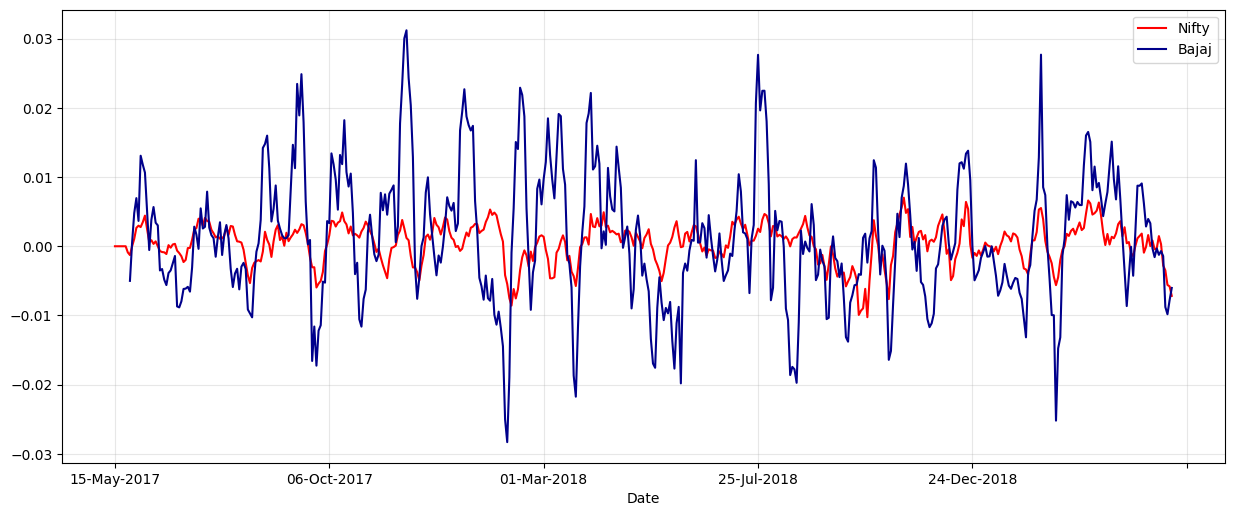

In [36]:
plt.figure(figsize = (15,6), dpi = 100)
volatility_nifty.plot(color = 'red')
rolling_avg_bajaj.plot(color = 'darkBlue')
plt.legend(['Nifty', 'Bajaj'])
plt.grid(alpha = 0.3)
plt.show()

# **Q 2.9**

**Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call is buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call is sell whenever smaller moving average crosses under longer moving average**

In [37]:

small_win = 21 #21 dyas moving average
long_win = 34 #34 days moving average

Trade_call = pd.DataFrame(index=df.index)
Trade_call['signal'] = 0.0 #initializing each signal to 0

#Smaller moving average (21 days)
Trade_call['small_mavg'] = df['Close Price'].rolling(window=small_win, min_periods=1,center=False).mean() 

#Longer moving average (34 days)
Trade_call['long_mavg'] = df['Close Price'].rolling(window=long_win,min_periods=1, center=False).mean()

#Calculating only after the period of 21 days 
#where Small_mvag(21 days moving avg) is gretaer than long_mvag(34 days moving avg) set that signal value as 1.0, otherwise 0.0
Trade_call['signal'][small_win:] = np.where(Trade_call['small_mavg'][small_win:] > Trade_call['long_mavg'][small_win:], 1.0,0.0)


#creating another column based on the value of 'Signal' column
Trade_call['positions'] = Trade_call['signal'].diff() 
#difference between 2 consecutive 'signal' column 
#when 0.0 becomes 1.0 --> value of 'positions' = (1.0-0.0) = 1.0
#when 1.0 becomes 0.0 --> value of 'positions' = (0.0-1.0) = -1.0


print(Trade_call)

            signal  small_mavg   long_mavg  positions
Date                                                 
2017-05-15     0.0  951.550000  951.550000        NaN
2017-05-16     0.0  953.275000  953.275000        0.0
2017-05-17     0.0  953.116667  953.116667        0.0
2017-05-18     0.0  955.275000  955.275000        0.0
2017-05-19     0.0  955.810000  955.810000        0.0
...            ...         ...         ...        ...
2019-05-07     1.0  738.147619  736.216176        0.0
2019-05-08     0.0  736.530952  736.539706       -1.0
2019-05-09     0.0  735.252381  736.613235        0.0
2019-05-10     0.0  733.230952  736.808824        0.0
2019-05-13     0.0  730.966667  736.733824        0.0

[494 rows x 4 columns]


**Plotting the average price, small moving average(21) and long moving average(34)**

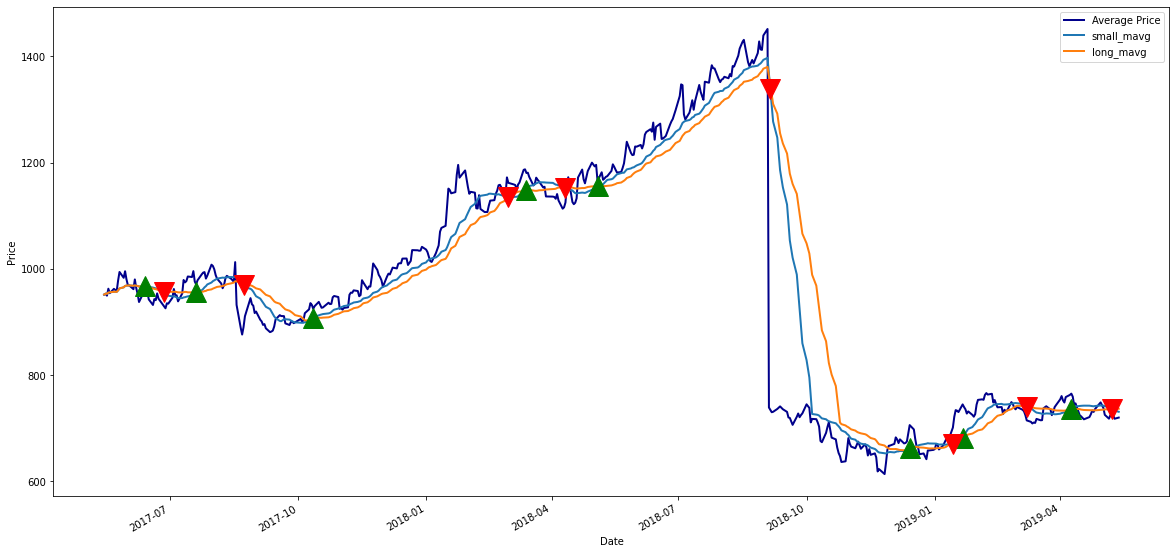

In [38]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,10))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plotting the closing price
df['Average Price'].plot(ax=ax1, color='darkblue', lw=2.)
plt.legend()

#plotting the small and long moving averages
Trade_call[['small_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plotting  the buy signals 
ax1.plot(Trade_call.loc[Trade_call.positions == 1.0].index, Trade_call.small_mavg[Trade_call.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(Trade_call.loc[Trade_call.positions == -1.0].index, Trade_call.small_mavg[Trade_call.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# **Q 2.10**

**Plotting the bollinger bands for Infy stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- The 14 day rolling mean of the closing price (we call it the average) Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Average Daily stock price. Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market**

In [0]:
df['14_day_Avg'] = df['Close Price'].rolling(14).mean()
df['14_day_std']=df['Close Price'].rolling(14).std()

In [0]:
df['Upper_Band'] =df['14_day_Avg'] + df['14_day_std']*2
df['Lower_Band'] =df['14_day_Avg'] - df['14_day_std']*2

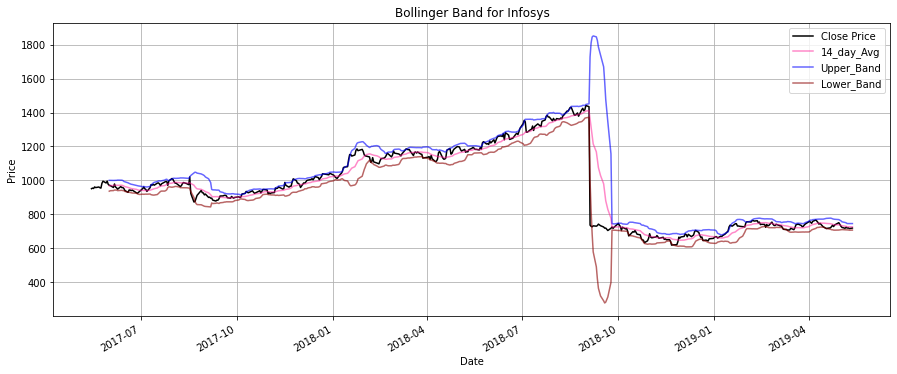

In [41]:
plt.figure(figsize = (15,6))
df['Close Price'].plot(color = 'black')
df['14_day_Avg'].plot(color = 'DeepPink', alpha = 0.5)
df['Upper_Band'].plot(color = 'Blue', alpha = 0.6)
df['Lower_Band'].plot(color = 'darkred', alpha = 0.6)
plt.grid()
plt.legend()
plt.title('Bollinger Band for Infosys')
plt.ylabel('Price')
plt.show();

**Saving in a new csv file**

In [0]:
df.to_csv('/content/drive/My Drive/internship/week3.csv')

In [44]:
df.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,vwap,Day_Perc_Change,Trend,14_day_Avg,14_day_std,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,,,,,
2019-05-07,INFY,EQ,718.40,720.40,727.90,718.7,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21,2019,5,904.435998,0.008561,Slight Positive,729.810714,10.288365,750.387444,709.233984
2019-05-08,INFY,EQ,724.55,721.00,726.00,716.5,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24,2019,5,904.046560,-0.007177,Slight Negative,727.782143,9.223936,746.230016,709.334270
2019-05-09,INFY,EQ,719.35,719.15,730.30,715.8,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01,2019,5,903.591847,0.002363,Slight or No change,727.321429,9.398542,746.118512,708.524346
2019-05-10,INFY,EQ,721.05,720.80,726.00,715.0,716.50,716.85,717.88,8352335,5.995942e+09,181229,5545377,66.39,2019,5,903.069330,-0.005825,Slight Negative,726.803571,9.781625,746.366821,707.240322
2019-05-13,INFY,EQ,716.85,716.55,726.45,712.1,718.00,719.70,720.09,6808993,4.903098e+09,201194,4745909,69.70,2019,5,902.652009,0.003976,Slight or No change,726.992857,9.602361,746.197578,707.788136
